This notebook contains the code for creating the diamond indicator silicate mineral neural network to predict whether the mineral is associated with rich or poor diamond contents.

We will go through the following in this notebook:

- Exploring and Processing the Data
- Building and Training our Neural Network
- Visualizing Loss and Accuracy
- Adding Regularization to our Neural Network
- Saving and testing the model
- Visualizing the model results

Note that the results you get might differ slightly as there is a degree of randomness in the way the dataset is split as well as the initialization of the neural network.

Under the Home tab for Anaconda Navigator 1.10.0 Launch CMD.exe Prompt to open C:\Windows\system32\cmd.exe prompt. This prompt will show C:\Users\Name but the installation of the packages will be directed to whichever drive in which Anaconda is installed.

For this Coding Companion the following packages were installed:

- pip install keras
- pip install tensorflow
- pip install pydot
- pip install graphviz
- pip install plotly==4.14.3

## Exploring and Processing the Data

We first have to read in the CSV file that we've been given. The following packages are used:
- pandas for importing
- matplotlib.pyplot for creating graphs
- seaborn for graph sizes and palettes
- pydot and graphviz to view the neural network
- VIANN to check neural network feature importance?
- and run a checkon the python version.
This code was created using Python 3.8.8 version.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import sklearn.metrics

import pydot
import graphviz

from platform import python_version
print('python: %s' % python_version())

python: 3.8.8


In [2]:
# check scikit-learn version as 0.24.1
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.24.1


**Fix random seed for reproducibility**

In [3]:
np.random.seed(333)

**Import and view the data**

In [4]:
#Check working directory
import os
os.getcwd( )

'C:\\Users\\David\\DiamondIndicatorMineral_LAICPMS-ML'

In [5]:
#Change working directory
os.chdir('g:\\R_and_D\\Projects\\MSc_Diamonds\\Python')
os.getcwd( )

'g:\\R_and_D\\Projects\\MSc_Diamonds\\Python'

In [6]:
#Read in csv file
df = pd.read_csv('OPX_final.csv')

In [7]:
df

,Sample,Mineral,Pipe,Diamond_High,Craton,Mg,Al,Si,Ca,V,...,Ni_clr,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,Ap24F15,OP,KOALA,yes,Slave,103800,2768.0,271600,2581.0,25.67,...,-1.021425,0.018495,0.211871,-0.028601,-0.005819,0.005815,0.054829,-0.080849,-0.059166,8.330000e-17
1,Ap24F18,OP,KOALA,yes,Slave,133700,2526.0,271300,2279.0,22.10,...,-1.134259,-0.010679,0.224197,0.094910,-0.008133,-0.051116,0.099236,-0.011106,-0.028282,-1.800000e-16
2,Ap27F22,OP,KOALA,yes,Slave,141900,2927.0,272100,2547.0,18.35,...,-1.017159,-0.051555,0.215650,0.022975,0.011722,-0.073733,0.028302,-0.003305,-0.027245,-9.710000e-17
3,Ap27G03,OP,KOALA,yes,Slave,147400,3383.0,271000,2272.0,18.92,...,-4.342650,0.046200,-0.107390,0.104044,-0.098741,-0.055501,-0.001135,0.028882,-0.020737,2.360000e-16
4,Ap27G04,OP,KOALA,yes,Slave,144500,2271.0,273200,2001.0,9.25,...,-4.470536,-0.083016,-0.159172,0.142559,-0.099865,-0.172184,-0.023572,0.002183,0.034197,5.550000e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Ap27I18,OP,ZERO,no,Kaapvaal,85620,6539.0,259400,7621.0,62.02,...,-3.924783,0.318997,-0.049985,-0.293467,0.100430,0.050737,-0.037432,-0.063506,-0.024164,2.010000e-16
58,Ap27K07,OP,ZERO,no,Kaapvaal,139100,6767.0,262700,4505.0,32.05,...,-4.448734,0.297557,-0.044068,0.149597,0.019815,-0.150580,0.065924,0.088673,-0.088131,-1.670000e-16
59,Ap27K08,OP,ZERO,no,Kaapvaal,311100,221.0,271100,844.1,8.57,...,-3.293778,-0.587105,-0.347972,-0.171081,-0.211471,0.133303,0.049407,0.091499,-0.040464,-1.890000e-16
60,Ap27K09,OP,ZERO,no,Kaapvaal,135300,7453.0,263900,7480.0,55.42,...,-4.170358,0.276190,-0.060326,-0.193306,0.189782,-0.023299,-0.036312,0.062381,0.036518,-4.860000e-17


**The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:**

In [8]:
dataset = df.values

In [9]:
dataset

array([['    Ap24F15', 'OP', 'KOALA', ..., -0.080849298, -0.059165974,
        8.33e-17],
       ['    Ap24F18', 'OP', 'KOALA', ..., -0.011106034, -0.028282477,
        -1.8e-16],
       ['    Ap27F22', 'OP', 'KOALA', ..., -0.003305476, -0.027244819,
        -9.71e-17],
       ...,
       ['    Ap27K08', 'OP', 'ZERO', ..., 0.091499479, -0.040463903,
        -1.89e-16],
       ['    Ap27K09', 'OP', 'ZERO', ..., 0.06238089, 0.036517908,
        -4.86e-17],
       ['    Ap27K10', 'OP', 'ZERO', ..., 0.022199491, 0.000891454,
        -8.33e-17]], dtype=object)

### Visualize the data by Diamond Contents based on previously run RQ-PCA

In [10]:
#Set plot style
import matplotlib.style as style

style.use('seaborn-paper') #sets the style as paper (smaller), poster (larger), talk (presentation)

colors = ("#0f2080", "#f5793a", "#85c0f9", "#a95aa1") #defines colours to use as suitable for colorblindness
sns.set_palette(sns.color_palette(colors)) #sets colour palette

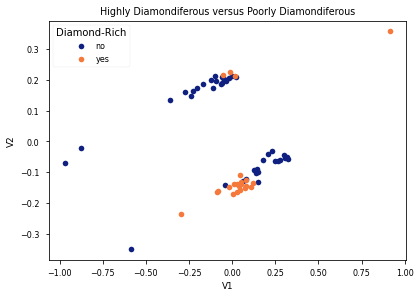

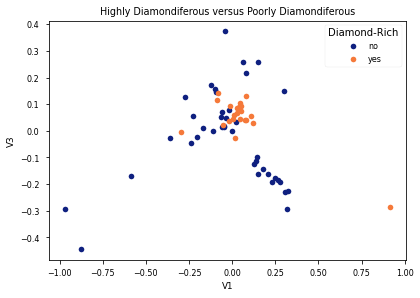

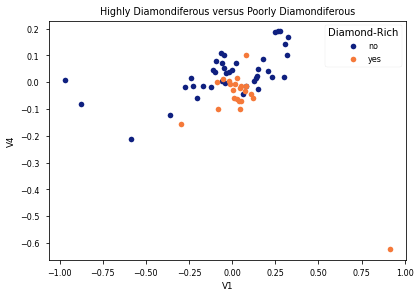

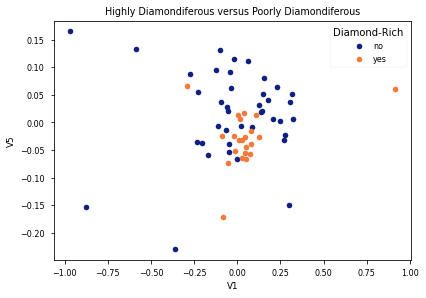

In [11]:
df.set_index(['Diamond_High', 'V1']).unstack('Diamond_High')['V2'].plot(style='o')
plt.ylabel('V2')
plt.title('Orthopyroxene Associations by Diamond Content')
plt.legend(title="Diamond-Rich")

df.set_index(['Diamond_High', 'V1']).unstack('Diamond_High')['V3'].plot(style='o')
plt.ylabel('V3')
plt.title('Orthopyroxene Associations by Diamond Content')
plt.legend(title="Diamond-Rich")

df.set_index(['Diamond_High', 'V1']).unstack('Diamond_High')['V4'].plot(style='o')
plt.ylabel('V4')
plt.title('Orthopyroxene Associations by Diamond Content')
plt.legend(title="Diamond-Rich")

df.set_index(['Diamond_High', 'V1']).unstack('Diamond_High')['V5'].plot(style='o')
plt.ylabel('V5')
plt.title('Orthopyroxene Associations by Diamond Content')
plt.legend(title="Diamond-Rich")

### Visualize the Orhtopyroxene RQ-PCA data by Pipe

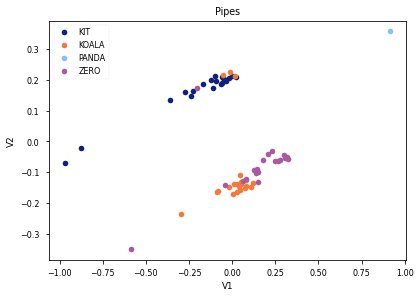

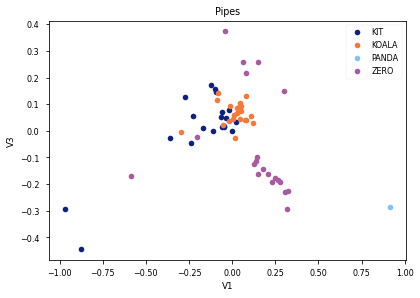

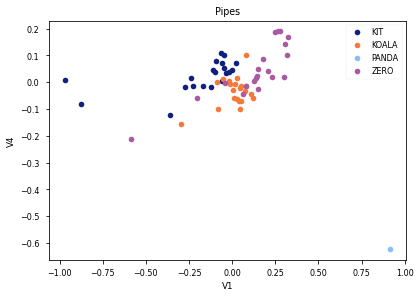

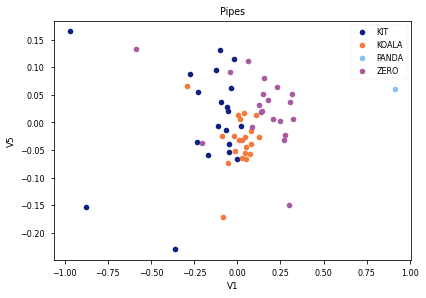

In [12]:
df.set_index(['Pipe', 'V1']).unstack('Pipe')['V2'].plot(style='o')
plt.ylabel('V2')
plt.title('Orthopyroxene Associations by Pipe')
plt.legend(title="")

df.set_index(['Pipe', 'V1']).unstack('Pipe')['V3'].plot(style='o')
plt.ylabel('V3')
plt.title('Orthopyroxene Associations by Pipe')
plt.legend(title="")

df.set_index(['Pipe', 'V1']).unstack('Pipe')['V4'].plot(style='o')
plt.ylabel('V4')
plt.title('Orthopyroxene Associations by Pipe')
plt.legend(title="")

df.set_index(['Pipe', 'V1']).unstack('Pipe')['V5'].plot(style='o')
plt.ylabel('V5')
plt.title('Orthopyroxene Associations by Pipe')
plt.legend(title="")

### Visualize the Orthopyroxene RQ-PCA data by Craton

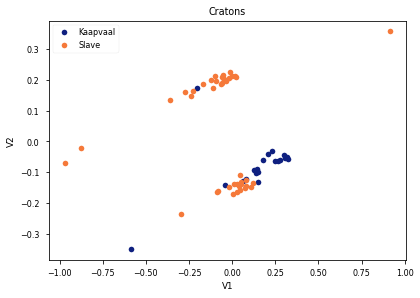

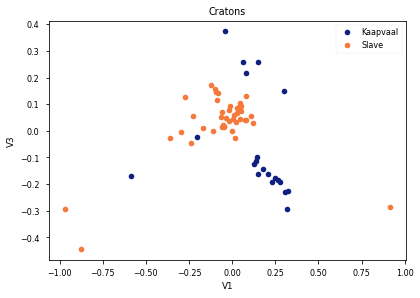

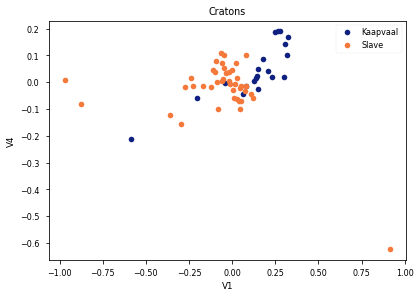

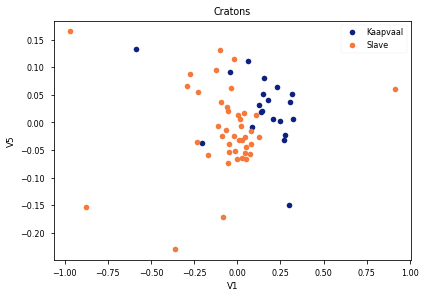

In [13]:
df.set_index(['Craton', 'V1']).unstack('Craton')['V2'].plot(style='o')
plt.ylabel('V2')
plt.title('Orthopyroxene Associations by Craton')
plt.legend(title="")

df.set_index(['Craton', 'V1']).unstack('Craton')['V3'].plot(style='o')
plt.ylabel('V3')
plt.title('Orthopyroxene Associations by Craton')
plt.legend(title="")

df.set_index(['Craton', 'V1']).unstack('Craton')['V4'].plot(style='o')
plt.ylabel('V4')
plt.title('Orthopyroxene Associations by Craton')
plt.legend(title="")

df.set_index(['Craton', 'V1']).unstack('Craton')['V5'].plot(style='o')
plt.ylabel('V5')
plt.title('Orthopyroxene Associations by Craton')
plt.legend(title="")

### Normalizing the Data

**Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We can use a min-max scaler from scikit-learn which scales our data to be between 0 and 1, but geochemical data is compositional. Compositional data consist of ratios that are not free to vary independently. This interdependence of geochemical data can result in an incorrect assessment of correlations, or other measures of associations, commonly used in multivariate statistics if the data isn't first transformed. Z-score transformation is not appropriate for multi-variate statistical analysis of geochemical data because z-score transformation assumes the data has a normal distribution. Most geochemical data has a left-skewed distribution. The substitution or removal of an element from multielement studies using raw or z-score normalized data would result in different interpretations, since the variable are not free to vary independently, and that research would not be suitable for a comparison with other research.**

**For this study the element concentrations were scaled using centred log-ratio method in R.**

### Splitting the Data

**Now, we split the dataset into our input features and the output feature we wish to predict because "y" needs to be one dimensional in order to split into train, test and validate groups. Using lowercase "y" shows that this is the unknown parameter.**

In [14]:
X = df[df.columns[14:23]]
y = df[['Diamond_High']]
print(y)
print(X)

   Diamond_High
0           yes
1           yes
2           yes
3           yes
4           yes
..          ...
57           no
58           no
59           no
60           no
61           no

[62 rows x 1 columns]
      Mg_clr    Al_clr    Si_clr    Ca_clr     V_clr    Cr_clr    Mn_clr  \
0   4.062807  0.438466  5.024671  0.368518 -4.242091 -0.076462 -0.875508   
1   4.367942  0.398981  5.075569  0.296080 -4.339834  0.307424 -1.080346   
2   4.425724  0.544579  5.076771  0.405517 -4.527524 -0.090499 -0.979757   
3   4.481865  0.707478  5.090834  0.309375 -4.478821  0.364184 -0.932422   
4   4.710480  0.557421  5.347405  0.430848 -4.945931  0.345879 -0.954547   
..       ...       ...       ...       ...       ...       ...       ...   
57  3.678692  1.106558  4.787145  1.259681 -3.551525 -1.094329 -0.713901   
58  4.191468  1.168332  4.827287  0.761462 -4.184184  0.442592 -1.407896   
59  5.458198 -1.791509  5.320572 -0.451400 -5.041403 -0.728516 -0.083885   
60  4.184797  1.285919  4

In [15]:
y_dm = pd.get_dummies(y['Diamond_High'], prefix = 'diamond')
y_dm

,diamond_no,diamond_yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
57,1,0
58,1,0
59,1,0
60,1,0


### Stratified Shuffle Split is used to ensure the same percentage of samples for each class occurs in each split

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=333)
sss.get_n_splits(X, y['Diamond_High'])

1

In [18]:
print(sss)

StratifiedShuffleSplit(n_splits=1, random_state=333, test_size=0.5,
            train_size=None)


In [19]:
#first split to create the training set and the test-validation dataset
for train_index, test_index in sss.split(X, y):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_testval = X.iloc[train_index], X.iloc[test_index]
     y_train, y_testval = y.iloc[train_index], y.iloc[test_index]

TRAIN: [17 13 26  1 16 58 38  9 11 37 53 25 39 15 20 33 54 23 46 52 28 49 18 32
 14 56 22 24 36  6 40] TEST: [ 3 45 19 41 34 43 12 31 42 21 44 47 51 35  0  2 59  7 55  4 57 29  8  5
 10 60 48 27 30 50 61]


In [20]:
#second split for creating the test and validation datasets
for train_index, test_index in sss.split(X_testval, y_testval):
     print("TEST:", train_index, "VAL:", test_index)
     X_test, X_val = X_testval.iloc[train_index], X_testval.iloc[test_index]
     y_test, y_val = y_testval.iloc[train_index], y_testval.iloc[test_index]

TEST: [ 8 12 17 28  7 18 16 13  1 14  4 23 19  2  3] VAL: [26 20 25  5 29 22 24 15  0 21  6 10 27 30 11  9]


In [21]:
y_train.head(5)

,Diamond_High
17,yes
13,yes
26,no
1,yes
16,yes


In [22]:
X_train.head(5)

,Mg_clr,Al_clr,Si_clr,Ca_clr,V_clr,Cr_clr,Mn_clr,Co_clr,Ni_clr
17,4.616337,0.551187,5.182400,0.419646,-4.193727,-0.128854,-0.983820,-0.928189,-4.534978
13,4.562772,0.531531,5.138177,0.414578,-4.406500,0.220571,-0.956562,-1.056000,-4.448567
26,4.343641,0.582708,5.084887,0.411945,-4.049761,-0.142813,-1.046464,-3.875516,-1.308627
1,4.367942,0.398981,5.075569,0.296080,-4.339834,0.307424,-1.080346,-3.891558,-1.134259
16,4.446299,0.339696,5.212650,0.279282,-4.190954,-0.059541,-0.853760,-0.810336,-4.363334


In [23]:
y_test.head(5)

,Diamond_High
42,no
51,no
7,yes
30,no
31,no


In [24]:
X_test.head(5)

,Mg_clr,Al_clr,Si_clr,Ca_clr,V_clr,Cr_clr,Mn_clr,Co_clr,Ni_clr
42,4.699326,0.403762,5.170869,0.202038,-4.799676,-0.250927,-0.690165,-3.692221,-1.043006
51,3.809213,1.096062,4.837393,1.169519,-3.520195,-1.066997,-0.855457,-1.541207,-3.928330
7,4.368864,0.415001,5.180162,0.448946,-4.362613,0.335066,-0.969999,-1.050761,-4.364666
30,4.630818,0.575157,5.227492,0.342289,-4.118105,-0.335019,-1.038891,-3.944120,-1.339621
31,4.559968,0.685881,5.152005,0.498136,-4.268312,-0.415279,-1.026869,-3.963524,-1.222008


In [25]:
y_val.head(5)

,Diamond_High
48,no
57,no
60,no
43,no
50,no


In [26]:
X_val.head(5)

,Mg_clr,Al_clr,Si_clr,Ca_clr,V_clr,Cr_clr,Mn_clr,Co_clr,Ni_clr
48,4.207566,1.152715,5.267157,-0.553267,-4.114179,0.423377,-0.981493,-0.940816,-4.461060
57,3.678692,1.106558,4.787145,1.259681,-3.551525,-1.094329,-0.713901,-1.547538,-3.924783
60,4.184797,1.285919,4.852873,1.289535,-3.615512,-1.176985,-0.980562,-1.669705,-4.170358
43,4.252286,1.252272,4.818176,1.264797,-3.661628,-1.171622,-1.009459,-1.586211,-4.158613
50,4.115828,0.605323,5.008571,0.763161,-3.941928,-0.456259,-0.785667,-1.254473,-4.054557


**Next encode the categorical variablesfor diamond content, yes and no, using one hot vector multilabel. The data is split first then one hot encoded since the split function cannot handle more than one Y column.**

In [27]:
y_traindm = pd.get_dummies(y_train['Diamond_High'], prefix = 'diamond')
y_traindm.head(5)

,diamond_no,diamond_yes
17,0,1
13,0,1
26,1,0
1,0,1
16,0,1


In [28]:
y_testdm = pd.get_dummies(y_test['Diamond_High'], prefix = 'diamond')
y_testdm.head(5)

,diamond_no,diamond_yes
42,1,0
51,1,0
7,0,1
30,1,0
31,1,0


In [29]:
y_valdm = pd.get_dummies(y_val['Diamond_High'], prefix = 'diamond')
y_valdm.head(5)

,diamond_no,diamond_yes
48,1,0
57,1,0
60,1,0
43,1,0
50,1,0


In [30]:
# Show the rows and columns count for each split
print(X_train.shape, X_val.shape, X_test.shape)
print(y_traindm.shape, y_valdm.shape, y_testdm.shape)

(31, 9) (16, 9) (15, 9)
(31, 2) (16, 2) (15, 2)


# Building and Training the Neural Network

**Keras is used to build our architecture and will need to be imported.**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json

## A Sequential model will be used, meaning that the layers are described in order. This neural network has two layers:

- Hidden layer 1: 10 neurons, ReLU activation (rectified linear activation for a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. Useful for developing multilayer Perceptron and convolutional neural networks.)
- Hidden layer 2: 5 neurons, ReLU activation
- Output Layer: 2 neurons, Softmax activation (allows for classification)
- Input Shape: 9 variables (centred log-ratio element concentrations)

In [32]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(9,)),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax'),
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
Total params: 167
Trainable params: 167
Non-trainable params: 0
_________________________________________________________________
None


## Setup Visualization of the Neural Network

In [33]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [34]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.4.0


In [35]:
import tensorboard
tensorboard.__version__

'2.4.0'

In [36]:
# Define the Keras TensorBoard callback prior to training.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Determine the Importance of the Features
We measure the importance of a feature by calculating the increase in the model's prediction error after permuting the feature. A feature is "important" if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction. A feature is "unimportant" if shuffling its values leaves the model error unchanged, because in this case the model ignored the feature for the prediction. The permutation feature importance measurement was introduced by Breiman (2001) for random forests. Based on this idea, Fisher, Rudin, and Dominici (2018) proposed a model-agnostic version of the feature importance and called it model reliance. They also introduced more advanced ideas about feature importance, for example a (model-specific) version that takes into account that many prediction models may predict the data well. Rebelo de Sá (2019) developed code to measure the variance of the weights calculated during the training phase to get the relative importance of the features in the neural network.

In [37]:
#Setting up feature importance tracking
#Rebelo de Sá, C. (2019). Variance-based feature importance in neural networks.
#22st International Conference on Discovery Science (DS 2019) Split, Croatia, October 28-30, 2019


class VarImpVIANN(keras.callbacks.Callback):
    def __init__(self, verbose=0):
        self.verbose = verbose
        self.n = 0
        self.M2 = 0.0

    def on_train_begin(self, logs={}, verbose = 1):
        if self.verbose:
            print("VIANN version 1.0 (Wellford + Mean) update per epoch")
        self.diff = self.model.layers[0].get_weights()[0]
        
    def on_epoch_end(self, batch, logs={}):
        currentWeights = self.model.layers[0].get_weights()[0]
        
        self.n += 1
        delta = np.subtract(currentWeights, self.diff)
        self.diff += delta/self.n
        delta2 = np.subtract(currentWeights, self.diff)
        self.M2 += delta*delta2
            
        self.lastweights = self.model.layers[0].get_weights()[0]

    def on_train_end(self, batch, logs={}):
        if self.n < 2:
            self.s2 = float('nan')
        else:
            self.s2 = self.M2 / (self.n - 1)
        
        scores = np.sum(np.multiply(self.s2, np.abs(self.lastweights)), axis = 1)
        
        self.varScores = (scores - min(scores)) / (max(scores) - min(scores))
        if self.verbose:
            print("Most important variables: ",
                  np.array(self.varScores).argsort()[-10:][::-1])

VIANN = VarImpVIANN(verbose=1)

# Coding Companion for Diamond Indicator Silicate Mineral Neural Network - Chrome Diopside (Annotated)

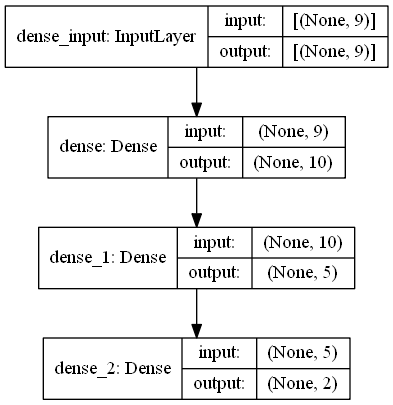

In [38]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_OPX_template.png', show_shapes=True, show_layer_names=True)

**Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by:**
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent, **sgd**)
- Telling it what loss function to use (for binary classification, we will use **binary cross entropy**)
- Telling it what other metrics you want to track apart from the loss function (we want to track **accuracy** as well)

In [39]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Training on the data is pretty straightforward and requires one line of code. The function is called 'fit' as we are fitting the parameters to the data.**

**We specify:**
- What data we are training on, which is X_train and y_train
- The size of our mini-batch (since we only have 31 training samples we won't split into mini-batches)
- How long we want to train it for (epochs)
- What our validation data is so that the model will tell us how we are doing on the validation data at each point.

**This function will output a history, which we save under the variable hist to be used later.**

In [40]:
hist = model.fit(X_train, y_traindm,
          batch_size=31, epochs=100,
          validation_data=(X_val, y_valdm), callbacks = [VIANN])

VIANN version 1.0 (Wellford + Mean) update per epoch
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.5157 - accuracy: 0.3548 - val_loss: 1.2502 - val_accuracy: 0.3750
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 1.4307 - accuracy: 0.3548 - val_loss: 1.1817 - val_accuracy: 0.3750
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 1.3548 - accuracy: 0.3548 - val_loss: 1.1208 - val_accuracy: 0.3750
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 1.2868 - accuracy: 0.3548 - val_loss: 1.0669 - val_accuracy: 0.3750
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 1.2261 - accuracy: 0.3548 - val_loss: 1.0194 - val_accuracy: 0.3750
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 1.1721 - accuracy: 0.3548 - val_loss: 0.9775 - val_accuracy: 0.3750
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 1.1241 - accuracy: 0.3548 - val_loss:

Epoch 59/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6914 - accuracy: 0.6452 - val_loss: 0.6584 - val_accuracy: 0.6250
Epoch 60/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6906 - accuracy: 0.6452 - val_loss: 0.6582 - val_accuracy: 0.6250
Epoch 61/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6898 - accuracy: 0.6452 - val_loss: 0.6581 - val_accuracy: 0.6250
Epoch 62/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6890 - accuracy: 0.6452 - val_loss: 0.6580 - val_accuracy: 0.6250
Epoch 63/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6883 - accuracy: 0.6452 - val_loss: 0.6579 - val_accuracy: 0.6250
Epoch 64/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6876 - accuracy: 0.6452 - val_loss: 0.6578 - val_accuracy: 0.6250
Epoch 65/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6869 - accuracy: 0.6452 - val_loss: 0.6577 - val_accuracy: 0.6250
Epoch 66/100


# Visualizing Loss and Accuracy

**Visualize the training loss and the validation loss using matplotlib as plt. Note the separation between the training and validation data.**

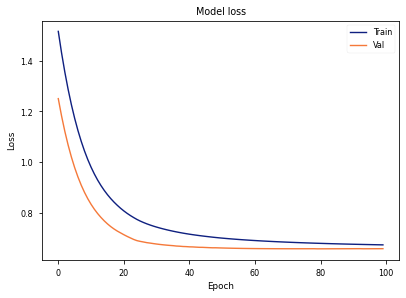

In [41]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**Then visualize the training accuracy and the validation accuracy. Note the separation between the validation and training accuracy indicating underfitting and the need for a larger network, more hidden layers, longer train time or more advanced algorithms.**

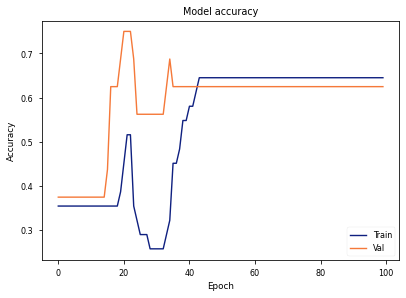

In [42]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [43]:
#Visualize Feature Importance in table format
X_columns = X_train.columns.tolist()
model_FI_scores = VIANN.varScores.tolist()

model_FI = pd.DataFrame()
model_FI['Variable'] = X_columns
model_FI['Scores'] = model_FI_scores
model_FI.sort_values(by=['Scores'], inplace=True, ascending=True)

model_FI

,Variable,Scores
3,Ca_clr,0.000000
5,Cr_clr,0.017697
6,Mn_clr,0.018100
1,Al_clr,0.033102
8,Ni_clr,0.258159
7,Co_clr,0.455530
2,Si_clr,0.748738
0,Mg_clr,0.962955
4,V_clr,1.000000


In [44]:
#Link Features to VIANN scores and export to csv
model_FI_array = np.vstack((X_train.columns, VIANN.varScores))
pd.DataFrame(model_FI_array).to_csv("OPX_model_FI.csv", index=None)
model_FI_array

array([['Mg_clr', 'Al_clr', 'Si_clr', 'Ca_clr', 'V_clr', 'Cr_clr',
        'Mn_clr', 'Co_clr', 'Ni_clr'],
       [0.9629549980163574, 0.03310159593820572, 0.7487383484840393, 0.0,
        1.0, 0.017697053030133247, 0.018100406974554062,
        0.4555301368236542, 0.2581588625907898]], dtype=object)

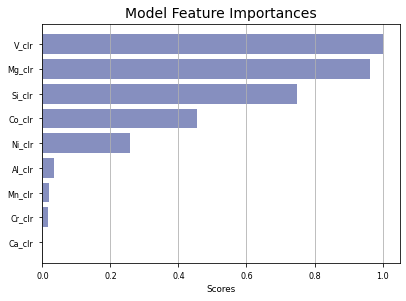

In [45]:
# Plot the feature importances of the model
fig, ax = plt.subplots()

ax.barh(model_FI['Variable'], model_FI['Scores'], align="center", alpha=0.5)
ax.set_xlabel('Scores')
ax.set_yticks(model_FI['Variable'])
ax.xaxis.grid(True)
ax.set_title("Model Feature Importances", fontsize='14')

# Save the figure and show
plt.savefig('OPX_model_FI_barplot.png')
plt.show()

**Visualize the neural network.**

In [46]:
#View tensorboard graphic of the neural network structure
#Re-run this cell if there is a timeout error
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 11316), started 1:59:46 ago. (Use '!kill 11316' to kill it.)

**Check model's performance on test data.**

In [47]:
model.evaluate(X_test, y_testdm)[1]

1/1 [==============================] - 0s 12ms/step - loss: 0.6555 - accuracy: 0.6667


0.6666666865348816

**Out dataset is small and the accuracy is low, therefore try adding in regularization and drop out.**

# Adding Regularization to the Neural Network

**Train a model which will overfit, which we call Model 2. Input shape is how many variables (22) and Dense is number of y values (2).**

In [48]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(9,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(2, activation='softmax'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, y_traindm,
          batch_size=31, epochs=200,
          validation_data=(X_val, y_valdm))

Epoch 1/200
1/1 [==============================] - 1s 556ms/step - loss: 0.6883 - accuracy: 0.6774 - val_loss: 0.7856 - val_accuracy: 0.6250
Epoch 2/200
1/1 [==============================] - 0s 47ms/step - loss: 0.7048 - accuracy: 0.6452 - val_loss: 0.6705 - val_accuracy: 0.6250
Epoch 3/200
1/1 [==============================] - 0s 42ms/step - loss: 0.5525 - accuracy: 0.6452 - val_loss: 0.7160 - val_accuracy: 0.3750
Epoch 4/200
1/1 [==============================] - 0s 40ms/step - loss: 0.5138 - accuracy: 0.7419 - val_loss: 0.7097 - val_accuracy: 0.7500
Epoch 5/200
1/1 [==============================] - 0s 41ms/step - loss: 0.4530 - accuracy: 0.8710 - val_loss: 0.7816 - val_accuracy: 0.6250
Epoch 6/200
1/1 [==============================] - 0s 42ms/step - loss: 0.4345 - accuracy: 0.8387 - val_loss: 0.8167 - val_accuracy: 0.6250
Epoch 7/200
1/1 [==============================] - 0s 44ms/step - loss: 0.4150 - accuracy: 0.8387 - val_loss: 0.7924 - val_accuracy: 0.7500
Epoch 8/200
1/1 [==

Epoch 59/200
1/1 [==============================] - 0s 43ms/step - loss: 2.7064e-04 - accuracy: 1.0000 - val_loss: 1.5609 - val_accuracy: 0.8750
Epoch 60/200
1/1 [==============================] - 0s 43ms/step - loss: 2.3645e-04 - accuracy: 1.0000 - val_loss: 1.5598 - val_accuracy: 0.8750
Epoch 61/200
1/1 [==============================] - 0s 42ms/step - loss: 1.8740e-04 - accuracy: 1.0000 - val_loss: 1.5550 - val_accuracy: 0.8750
Epoch 62/200
1/1 [==============================] - 0s 42ms/step - loss: 1.4662e-04 - accuracy: 1.0000 - val_loss: 1.5503 - val_accuracy: 0.8750
Epoch 63/200
1/1 [==============================] - 0s 44ms/step - loss: 1.2218e-04 - accuracy: 1.0000 - val_loss: 1.5479 - val_accuracy: 0.8750
Epoch 64/200
1/1 [==============================] - 0s 42ms/step - loss: 1.1034e-04 - accuracy: 1.0000 - val_loss: 1.5489 - val_accuracy: 0.8750
Epoch 65/200
1/1 [==============================] - 0s 41ms/step - loss: 1.0606e-04 - accuracy: 1.0000 - val_loss: 1.5536 - val_ac

1/1 [==============================] - 0s 43ms/step - loss: 2.4765e-05 - accuracy: 1.0000 - val_loss: 1.8121 - val_accuracy: 0.8750
Epoch 172/200
1/1 [==============================] - 0s 45ms/step - loss: 2.4636e-05 - accuracy: 1.0000 - val_loss: 1.8129 - val_accuracy: 0.8750
Epoch 173/200
1/1 [==============================] - 0s 45ms/step - loss: 2.4507e-05 - accuracy: 1.0000 - val_loss: 1.8136 - val_accuracy: 0.8750
Epoch 174/200
1/1 [==============================] - 0s 43ms/step - loss: 2.4379e-05 - accuracy: 1.0000 - val_loss: 1.8143 - val_accuracy: 0.8750
Epoch 175/200
1/1 [==============================] - 0s 42ms/step - loss: 2.4251e-05 - accuracy: 1.0000 - val_loss: 1.8150 - val_accuracy: 0.8750
Epoch 176/200
1/1 [==============================] - 0s 45ms/step - loss: 2.4122e-05 - accuracy: 1.0000 - val_loss: 1.8157 - val_accuracy: 0.8750
Epoch 177/200
1/1 [==============================] - 0s 43ms/step - loss: 2.3994e-05 - accuracy: 1.0000 - val_loss: 1.8164 - val_accuracy:

## Visualize to see what overfitting looks like in terms of the loss and accuracy.

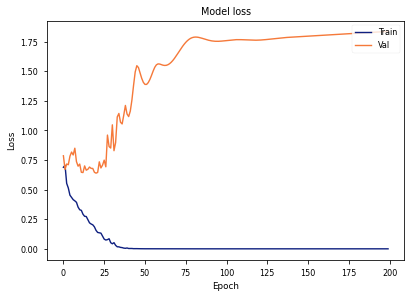

In [49]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**Overfitting is represented by an increase in loss in the validation set after the 20th epoch.**

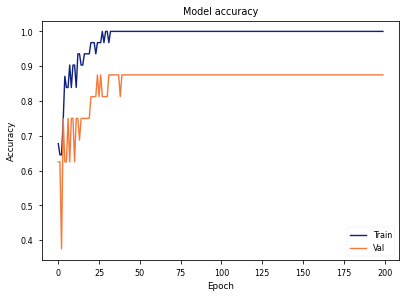

In [50]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Test Accuracy**

In [51]:
model_2.evaluate(X_test, y_testdm)[1]

1/1 [==============================] - 0s 13ms/step - loss: 2.7769 - accuracy: 0.8667


0.8666666746139526

## Incorporate Regularization and Dropout into the Third Model

**To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3). Input shape is how many variables (9) and Dense is number of y values (2).**

In [52]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [53]:
VIANN = VarImpVIANN(verbose=1)
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(9,)),
    Dropout(0.2),
    Dense(750, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(250, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(2, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [73]:
VIANN = VarImpVIANN(verbose=1)
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(9,)),
    Dropout(0.2),
    Dense(750, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(250, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(2, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [74]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, y_traindm,
          batch_size=31, epochs=200,
          validation_data=(X_val, y_valdm), callbacks = [VIANN])

VIANN version 1.0 (Wellford + Mean) update per epoch
Epoch 1/200
1/1 [==============================] - 1s 843ms/step - loss: 20.2319 - accuracy: 0.3226 - val_loss: 19.4701 - val_accuracy: 0.6250
Epoch 2/200
1/1 [==============================] - 0s 52ms/step - loss: 19.4645 - accuracy: 0.6452 - val_loss: 18.7797 - val_accuracy: 0.6250
Epoch 3/200
1/1 [==============================] - 0s 40ms/step - loss: 18.7819 - accuracy: 0.6452 - val_loss: 18.1015 - val_accuracy: 0.6250
Epoch 4/200
1/1 [==============================] - 0s 39ms/step - loss: 18.0399 - accuracy: 0.6774 - val_loss: 17.4359 - val_accuracy: 0.6250
Epoch 5/200
1/1 [==============================] - 0s 38ms/step - loss: 17.3545 - accuracy: 0.6452 - val_loss: 16.7917 - val_accuracy: 0.6250
Epoch 6/200
1/1 [==============================] - 0s 40ms/step - loss: 16.6849 - accuracy: 0.7097 - val_loss: 16.1762 - val_accuracy: 0.6875
Epoch 7/200
1/1 [==============================] - 0s 39ms/step - loss: 16.0582 - accuracy: 0.

1/1 [==============================] - 0s 40ms/step - loss: 0.7126 - accuracy: 0.9677 - val_loss: 1.0473 - val_accuracy: 0.7500
Epoch 117/200
1/1 [==============================] - 0s 39ms/step - loss: 0.6917 - accuracy: 0.9677 - val_loss: 1.0470 - val_accuracy: 0.7500
Epoch 118/200
1/1 [==============================] - 0s 40ms/step - loss: 0.6508 - accuracy: 0.9677 - val_loss: 1.0313 - val_accuracy: 0.8750
Epoch 119/200
1/1 [==============================] - 0s 40ms/step - loss: 0.6814 - accuracy: 0.9355 - val_loss: 1.0533 - val_accuracy: 0.8125
Epoch 120/200
1/1 [==============================] - 0s 38ms/step - loss: 0.6776 - accuracy: 0.9677 - val_loss: 1.0754 - val_accuracy: 0.8125
Epoch 121/200
1/1 [==============================] - 0s 40ms/step - loss: 0.6460 - accuracy: 0.9355 - val_loss: 1.0384 - val_accuracy: 0.8125
Epoch 122/200
1/1 [==============================] - 0s 38ms/step - loss: 0.6152 - accuracy: 0.9677 - val_loss: 1.0289 - val_accuracy: 0.8750
Epoch 123/200
1/1 [=

Epoch 174/200
1/1 [==============================] - 0s 41ms/step - loss: 0.4529 - accuracy: 0.9677 - val_loss: 0.7922 - val_accuracy: 0.8750
Epoch 175/200
1/1 [==============================] - 0s 39ms/step - loss: 0.4403 - accuracy: 0.9677 - val_loss: 0.7993 - val_accuracy: 0.8750
Epoch 176/200
1/1 [==============================] - 0s 40ms/step - loss: 0.4620 - accuracy: 0.9677 - val_loss: 0.8093 - val_accuracy: 0.8750
Epoch 177/200
1/1 [==============================] - 0s 39ms/step - loss: 0.4456 - accuracy: 0.9677 - val_loss: 0.8116 - val_accuracy: 0.8750
Epoch 178/200
1/1 [==============================] - 0s 39ms/step - loss: 0.4497 - accuracy: 0.9677 - val_loss: 0.8039 - val_accuracy: 0.8750
Epoch 179/200
1/1 [==============================] - 0s 40ms/step - loss: 0.4532 - accuracy: 0.9677 - val_loss: 0.7983 - val_accuracy: 0.8750
Epoch 180/200
1/1 [==============================] - 0s 38ms/step - loss: 0.4683 - accuracy: 0.9355 - val_loss: 0.8180 - val_accuracy: 0.8750
Epoch 

## Visualize the loss and accuracy graphs for Model 3.

**The loss is a lot higher at the start, and that's because we've changed our loss function. The plot window can be zoomed in by adding an additional line of code: plt.ylim.**

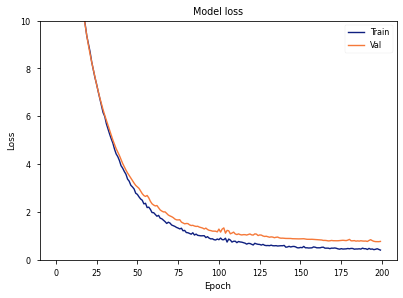

In [75]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=10, bottom=0)
plt.show()

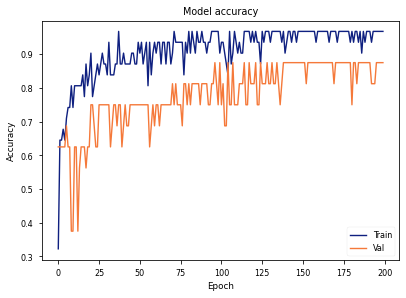

In [76]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Compared to Model 2, there is less overfitting. Although not ideal, the validation accuracy is likely due to the small sample size or, since we are using dropout, the model at test time is more robust and leads to higher testing accuracies.**

## Evaluate Model 3 and Print the Results

**Test Accuracy**

In [77]:
model_3.evaluate(X_test, y_testdm)[1]

1/1 [==============================] - 0s 13ms/step - loss: 1.1247 - accuracy: 0.8667


0.8666666746139526

**The test accuracy is good considering we only trained with 31 records.**

In [78]:
#Visualize Feature Importance in table format
X_columns = X_train.columns.tolist()
model_FI_scores = VIANN.varScores.tolist()

model_FI = pd.DataFrame()
model_FI['Variable'] = X_columns
model_FI['Scores'] = model_FI_scores
model_FI.sort_values(by=['Scores'], inplace=True, ascending=True)

model_FI

,Variable,Scores
2,Si_clr,0.000000
0,Mg_clr,0.010113
4,V_clr,0.012799
8,Ni_clr,0.014870
6,Mn_clr,0.055944
3,Ca_clr,0.183488
7,Co_clr,0.244277
5,Cr_clr,0.925977
1,Al_clr,1.000000


In [79]:
#Link Features to VIANN scores and export to csv
model_FI_array = np.vstack((X_train.columns, VIANN.varScores))
pd.DataFrame(model_FI_array).to_csv("OPX_model_FI.csv", index=None)
model_FI_array

array([['Mg_clr', 'Al_clr', 'Si_clr', 'Ca_clr', 'V_clr', 'Cr_clr',
        'Mn_clr', 'Co_clr', 'Ni_clr'],
       [0.010112562216818333, 1.0, 0.0, 0.1834884136915207,
        0.012798684649169445, 0.9259769320487976, 0.05594445765018463,
        0.24427661299705505, 0.01486975234001875]], dtype=object)

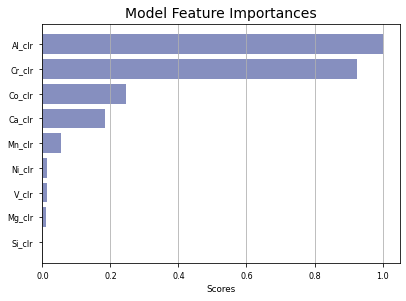

In [80]:
# Plot the feature importances of the model
fig, ax = plt.subplots()

ax.barh(model_FI['Variable'], model_FI['Scores'], align="center", alpha=0.5)
ax.set_xlabel('Scores')
ax.set_yticks(model_FI['Variable'])
ax.xaxis.grid(True)
ax.set_title("Model Feature Importances", fontsize='14')

# Save the figure and show
plt.savefig('OPX_model_FI_barplot.png')
plt.show()

**Compute the probabilities and predictions on the test set.**

In [81]:
predictions =  model_3.predict_classes(X_test)
probabilities = model_3.predict(X_test)

G:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [82]:
predictions2 = pd.DataFrame(data = predictions,index = X_test.index.copy())
predictions2.columns = ['predict_class']
probabilities2 = pd.DataFrame(data = probabilities,index = X_test.index.copy())
probabilities2.columns = ['prob_no', 'prob_yes']
probabilities2.head(5)

,prob_no,prob_yes
42,0.940916,0.056978
51,0.973196,0.025558
7,0.022631,0.978230
30,0.940922,0.056968
31,0.947056,0.050966


In [83]:
OPX_testresults = pd.concat([X_test,y_test,predictions2,probabilities2],axis=1)
OPX_testresults.to_csv("OPX_model3results_short.csv")
OPX_testresults.head(5)

,Mg_clr,Al_clr,Si_clr,Ca_clr,V_clr,Cr_clr,Mn_clr,Co_clr,Ni_clr,Diamond_High,predict_class,prob_no,prob_yes
42,4.699326,0.403762,5.170869,0.202038,-4.799676,-0.250927,-0.690165,-3.692221,-1.043006,no,0,0.940916,0.056978
51,3.809213,1.096062,4.837393,1.169519,-3.520195,-1.066997,-0.855457,-1.541207,-3.928330,no,0,0.973196,0.025558
7,4.368864,0.415001,5.180162,0.448946,-4.362613,0.335066,-0.969999,-1.050761,-4.364666,yes,1,0.022631,0.978230
30,4.630818,0.575157,5.227492,0.342289,-4.118105,-0.335019,-1.038891,-3.944120,-1.339621,no,0,0.940922,0.056968
31,4.559968,0.685881,5.152005,0.498136,-4.268312,-0.415279,-1.026869,-3.963524,-1.222008,no,0,0.947056,0.050966


In [84]:
OPX_testresults2 = predictions2.join([probabilities2, df])
OPX_testresults2.to_csv("OPX_model3results_all.csv")
OPX_testresults2.head(5)

,predict_class,prob_no,prob_yes,Sample,Mineral,Pipe,Diamond_High,Craton,Mg,Al,...,Ni_clr,V1,V2,V3,V4,V5,V6,V7,V8,V9
42,0.0,0.940916,0.056978,Ap27D11,OP,ZERO,no,Kaapvaal,170300,2321.0,...,-1.043006,-0.201733,0.174493,-0.024610,-0.057111,-0.037614,-0.043577,0.006365,0.006688,2.220000e-16
51,0.0,0.973196,0.025558,Ap27I12,OP,ZERO,no,Kaapvaal,94350,6258.0,...,-3.928330,0.304149,-0.054429,-0.228946,0.143579,0.037238,-0.015600,-0.036615,-0.014366,6.940000e-17
7,1.0,0.022631,0.978230,Ap27G07,OP,KOALA,yes,Slave,120800,2317.0,...,-4.364666,0.050535,-0.132955,0.091942,-0.069733,-0.066480,0.057006,-0.023502,-0.003256,5.550000e-17
30,0.0,0.940922,0.056968,Ap27F20,OP,KIT,no,Slave,150600,2609.0,...,-1.339621,-0.066254,0.185633,0.053781,0.108616,-0.013349,0.047033,0.011758,0.070898,-2.780000e-17
31,0.0,0.947056,0.050966,Ap27F21,OP,KIT,no,Slave,151300,3143.0,...,-1.222008,-0.045172,0.201776,0.013602,0.100236,-0.053309,0.021056,0.017270,0.042337,2.780000e-17


# Save the Model

**Serialize model to JSON for later use.**

In [85]:
# save model and architecture to single file
model_3.save("model_3_OPX.h5")
print("Saved model to disk")

Saved model to disk


# Run Model on More Data

**Load JSON and create the model**

In [86]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model_3_OPX = load_model('model_3_OPX.h5')
print("Loaded model from disk")

Loaded model from disk


# Prediction with New Data with Unknown Classifier (y)

**Using X_test data and predicting y. Make sure the X data is scaled the same as the data used in the model.**
**Predict y.**

In [87]:
y_new = model_3_OPX.predict(X_test)
y_new

array([[9.4091648e-01, 5.6977510e-02],
       [9.7319561e-01, 2.5558203e-02],
       [2.2631407e-02, 9.7823012e-01],
       [9.4092226e-01, 5.6967854e-02],
       [9.4705588e-01, 5.0966293e-02],
       [9.7411489e-01, 2.4669379e-02],
       [1.0540952e-04, 9.9990654e-01],
       [9.2664516e-01, 7.0976257e-02],
       [7.5130856e-01, 2.4533594e-01],
       [9.2480934e-01, 7.2778612e-02],
       [9.3199199e-01, 6.5722734e-02],
       [2.4419338e-02, 9.7649479e-01],
       [1.6773224e-02, 9.8394144e-01],
       [4.7931850e-02, 9.5320213e-01],
       [9.3936855e-01, 5.8491737e-02]], dtype=float32)

**Print the input data and the predicted values. Replace X_test with the new data with an unknown classifier.**

In [88]:
predictions_new =  model_3_OPX.predict_classes(X_test)
probabilities_new = model_3_OPX.predict(X_test)

G:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [89]:
predictions_new2 = pd.DataFrame(data = predictions_new,index = X_test.index.copy())
predictions_new2.columns = ['predict_class']
probabilities_new2 = pd.DataFrame(data = probabilities_new,index = X_test.index.copy())
probabilities_new2.columns = ['prob_no', 'prob_yes']
probabilities_new2.head(5)

,prob_no,prob_yes
42,0.940916,0.056978
51,0.973196,0.025558
7,0.022631,0.978230
30,0.940922,0.056968
31,0.947056,0.050966


**Generate accuracy prediction as dataframe object for importing into other programs.**

In [90]:
OPX_newresults = predictions_new2.join([probabilities_new2, df])
OPX_newresults.to_csv("OPX_newresults.csv")
OPX_newresults.head(5)

,predict_class,prob_no,prob_yes,Sample,Mineral,Pipe,Diamond_High,Craton,Mg,Al,...,Ni_clr,V1,V2,V3,V4,V5,V6,V7,V8,V9
42,0.0,0.940916,0.056978,Ap27D11,OP,ZERO,no,Kaapvaal,170300,2321.0,...,-1.043006,-0.201733,0.174493,-0.024610,-0.057111,-0.037614,-0.043577,0.006365,0.006688,2.220000e-16
51,0.0,0.973196,0.025558,Ap27I12,OP,ZERO,no,Kaapvaal,94350,6258.0,...,-3.928330,0.304149,-0.054429,-0.228946,0.143579,0.037238,-0.015600,-0.036615,-0.014366,6.940000e-17
7,1.0,0.022631,0.978230,Ap27G07,OP,KOALA,yes,Slave,120800,2317.0,...,-4.364666,0.050535,-0.132955,0.091942,-0.069733,-0.066480,0.057006,-0.023502,-0.003256,5.550000e-17
30,0.0,0.940922,0.056968,Ap27F20,OP,KIT,no,Slave,150600,2609.0,...,-1.339621,-0.066254,0.185633,0.053781,0.108616,-0.013349,0.047033,0.011758,0.070898,-2.780000e-17
31,0.0,0.947056,0.050966,Ap27F21,OP,KIT,no,Slave,151300,3143.0,...,-1.222008,-0.045172,0.201776,0.013602,0.100236,-0.053309,0.021056,0.017270,0.042337,2.780000e-17


## Re-Split Data and Verify Results

In [91]:
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=333)
sss2.get_n_splits(X, y['Diamond_High'])

1

In [92]:
print(sss)

StratifiedShuffleSplit(n_splits=1, random_state=333, test_size=0.5,
            train_size=None)


In [93]:
for train_index, test_index in sss2.split(X, y):
     print("TRAIN:", train_index, "TESTVAL:", test_index)
     X_train2, X_testval2 = X.iloc[train_index], X.iloc[test_index]
     y_train2, y_testval2 = y.iloc[train_index], y.iloc[test_index]

TRAIN: [17 13 26  1 16 58 38  9 11 37 53 25 39 15 20 33 54 23 46 52 28 49 18 32
 14 56 22 24 36  6 40] TESTVAL: [ 3 45 19 41 34 43 12 31 42 21 44 47 51 35  0  2 59  7 55  4 57 29  8  5
 10 60 48 27 30 50 61]


**Split testval into test and validation sets**

In [94]:
for train_index, test_index in sss.split(X_testval2, y_testval2):
     print("TEST:", train_index, "VAL:", test_index)
     X_test2, X_val2 = X_testval2.iloc[train_index], X_testval2.iloc[test_index]
     y_test2, y_val2 = y_testval2.iloc[train_index], y_testval2.iloc[test_index]

TEST: [ 8 12 17 28  7 18 16 13  1 14  4 23 19  2  3] VAL: [26 20 25  5 29 22 24 15  0 21  6 10 27 30 11  9]


In [95]:
y_test2.head(5)

,Diamond_High
42,no
51,no
7,yes
30,no
31,no


In [96]:
y_val2.head(5)

,Diamond_High
48,no
57,no
60,no
43,no
50,no


**Next encode the categorical variablesfor diamond content, yes and no, using one hot vector multilabel. The data is split first then one hot encoded since the split function cannot handle more than one Y column.**

In [97]:
y_traindm2 = pd.get_dummies(y_train2['Diamond_High'], prefix = 'diamond')
y_traindm2.head(5)

,diamond_no,diamond_yes
17,0,1
13,0,1
26,1,0
1,0,1
16,0,1


In [98]:
y_valdm2 = pd.get_dummies(y_val2['Diamond_High'], prefix = 'diamond')
y_valdm2.head(5)

,diamond_no,diamond_yes
48,1,0
57,1,0
60,1,0
43,1,0
50,1,0


In [99]:
y_testdm2 = pd.get_dummies(y_test2['Diamond_High'], prefix = 'diamond')
y_testdm2.head(5)

,diamond_no,diamond_yes
42,1,0
51,1,0
7,0,1
30,1,0
31,1,0


In [100]:
X_val2.head(5)

,Mg_clr,Al_clr,Si_clr,Ca_clr,V_clr,Cr_clr,Mn_clr,Co_clr,Ni_clr
48,4.207566,1.152715,5.267157,-0.553267,-4.114179,0.423377,-0.981493,-0.940816,-4.461060
57,3.678692,1.106558,4.787145,1.259681,-3.551525,-1.094329,-0.713901,-1.547538,-3.924783
60,4.184797,1.285919,4.852873,1.289535,-3.615512,-1.176985,-0.980562,-1.669705,-4.170358
43,4.252286,1.252272,4.818176,1.264797,-3.661628,-1.171622,-1.009459,-1.586211,-4.158613
50,4.115828,0.605323,5.008571,0.763161,-3.941928,-0.456259,-0.785667,-1.254473,-4.054557


In [101]:
print(X_train2.shape, X_val2.shape, X_test2.shape)
print(y_traindm2.shape, y_valdm2.shape, y_testdm2.shape)

(31, 9) (16, 9) (15, 9)
(31, 2) (16, 2) (15, 2)


## Evaluate Model 3 with Re-Split Data and Print the Results

**Test Accuracy**

In [102]:
VIANN = VarImpVIANN(verbose=1)
model_3_OPX.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_4 = model_3_OPX.fit(X_train2, y_traindm2,
          batch_size=31, epochs=200,
          validation_data=(X_val2, y_valdm2), callbacks=[VIANN])

VIANN version 1.0 (Wellford + Mean) update per epoch
Epoch 1/200
1/1 [==============================] - 1s 849ms/step - loss: 0.4342 - accuracy: 0.9677 - val_loss: 0.8926 - val_accuracy: 0.7500
Epoch 2/200
1/1 [==============================] - 0s 48ms/step - loss: 0.4973 - accuracy: 0.9032 - val_loss: 1.1111 - val_accuracy: 0.6250
Epoch 3/200
1/1 [==============================] - 0s 38ms/step - loss: 0.6504 - accuracy: 0.8387 - val_loss: 0.9302 - val_accuracy: 0.6875
Epoch 4/200
1/1 [==============================] - 0s 39ms/step - loss: 0.5582 - accuracy: 0.8710 - val_loss: 0.7325 - val_accuracy: 0.8750
Epoch 5/200
1/1 [==============================] - 0s 41ms/step - loss: 0.4366 - accuracy: 0.9677 - val_loss: 0.9634 - val_accuracy: 0.7500
Epoch 6/200
1/1 [==============================] - 0s 42ms/step - loss: 0.5325 - accuracy: 0.9032 - val_loss: 0.9724 - val_accuracy: 0.7500
Epoch 7/200
1/1 [==============================] - 0s 40ms/step - loss: 0.4969 - accuracy: 0.9355 - val_lo

Epoch 59/200
1/1 [==============================] - 0s 39ms/step - loss: 0.3823 - accuracy: 0.9677 - val_loss: 0.7165 - val_accuracy: 0.8750
Epoch 60/200
1/1 [==============================] - 0s 38ms/step - loss: 0.3656 - accuracy: 0.9677 - val_loss: 0.7151 - val_accuracy: 0.8750
Epoch 61/200
1/1 [==============================] - 0s 40ms/step - loss: 0.3605 - accuracy: 0.9677 - val_loss: 0.7178 - val_accuracy: 0.8750
Epoch 62/200
1/1 [==============================] - 0s 42ms/step - loss: 0.3823 - accuracy: 0.9677 - val_loss: 0.7219 - val_accuracy: 0.8750
Epoch 63/200
1/1 [==============================] - 0s 40ms/step - loss: 0.3786 - accuracy: 0.9677 - val_loss: 0.7175 - val_accuracy: 0.8750
Epoch 64/200
1/1 [==============================] - 0s 39ms/step - loss: 0.3664 - accuracy: 0.9677 - val_loss: 0.7182 - val_accuracy: 0.8750
Epoch 65/200
1/1 [==============================] - 0s 40ms/step - loss: 0.3639 - accuracy: 0.9677 - val_loss: 0.7265 - val_accuracy: 0.8750
Epoch 66/200


Epoch 117/200
1/1 [==============================] - 0s 38ms/step - loss: 0.3423 - accuracy: 1.0000 - val_loss: 0.7498 - val_accuracy: 0.8750
Epoch 118/200
1/1 [==============================] - 0s 40ms/step - loss: 0.3409 - accuracy: 1.0000 - val_loss: 0.8100 - val_accuracy: 0.8750
Epoch 119/200
1/1 [==============================] - 0s 39ms/step - loss: 0.3150 - accuracy: 1.0000 - val_loss: 0.8617 - val_accuracy: 0.8125
Epoch 120/200
1/1 [==============================] - 0s 41ms/step - loss: 0.3259 - accuracy: 1.0000 - val_loss: 0.8295 - val_accuracy: 0.8750
Epoch 121/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3363 - accuracy: 1.0000 - val_loss: 0.7768 - val_accuracy: 0.8750
Epoch 122/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3167 - accuracy: 1.0000 - val_loss: 0.7847 - val_accuracy: 0.8750
Epoch 123/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3227 - accuracy: 1.0000 - val_loss: 0.7814 - val_accuracy: 0.8750
Epoch 

Epoch 175/200
1/1 [==============================] - 0s 40ms/step - loss: 0.3024 - accuracy: 1.0000 - val_loss: 0.7792 - val_accuracy: 0.8750
Epoch 176/200
1/1 [==============================] - 0s 39ms/step - loss: 0.3119 - accuracy: 1.0000 - val_loss: 0.9194 - val_accuracy: 0.8125
Epoch 177/200
1/1 [==============================] - 0s 39ms/step - loss: 0.3303 - accuracy: 0.9677 - val_loss: 0.8787 - val_accuracy: 0.8125
Epoch 178/200
1/1 [==============================] - 0s 39ms/step - loss: 0.3080 - accuracy: 1.0000 - val_loss: 0.8081 - val_accuracy: 0.8750
Epoch 179/200
1/1 [==============================] - 0s 39ms/step - loss: 0.2982 - accuracy: 1.0000 - val_loss: 0.7750 - val_accuracy: 0.8750
Epoch 180/200
1/1 [==============================] - 0s 39ms/step - loss: 0.3064 - accuracy: 1.0000 - val_loss: 0.7673 - val_accuracy: 0.8750
Epoch 181/200
1/1 [==============================] - 0s 39ms/step - loss: 0.2987 - accuracy: 1.0000 - val_loss: 0.7734 - val_accuracy: 0.8750
Epoch 

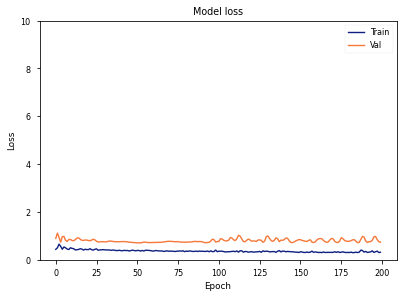

In [103]:
plt.plot(hist_4.history['loss'])
plt.plot(hist_4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=10, bottom=0)
plt.show()

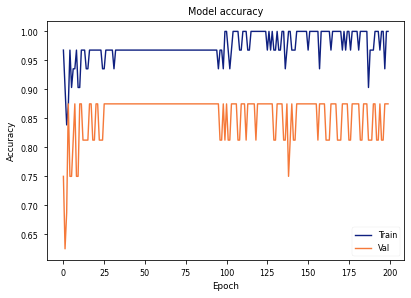

In [119]:
plt.plot(hist_4.history['accuracy'])
plt.plot(hist_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [120]:
model_3_OPX.evaluate(X_test2, y_testdm2)[1]

1/1 [==============================] - 0s 14ms/step - loss: 0.8415 - accuracy: 0.8667


0.8666666746139526

**Re-split model loss and accuracy are consistent with previous results.**

## Re-Split Data and Verify Results Again (Split number 3)

**Shuffle Split**

In [121]:
sss3 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=333)
sss3.get_n_splits(X, y['Diamond_High'])

1

In [122]:
print(sss3)

StratifiedShuffleSplit(n_splits=1, random_state=333, test_size=0.5,
            train_size=None)


In [123]:
for train_index, test_index in sss3.split(X, y):
     print("TRAIN:", train_index, "TESTVAL:", test_index)
     X_train3, X_testval3 = X.iloc[train_index], X.iloc[test_index]
     y_train3, y_testval3 = y.iloc[train_index], y.iloc[test_index]

TRAIN: [17 13 26  1 16 58 38  9 11 37 53 25 39 15 20 33 54 23 46 52 28 49 18 32
 14 56 22 24 36  6 40] TESTVAL: [ 3 45 19 41 34 43 12 31 42 21 44 47 51 35  0  2 59  7 55  4 57 29  8  5
 10 60 48 27 30 50 61]


**Split testval into test and validation sets**

In [124]:
for train_index, test_index in sss.split(X_testval3, y_testval3):
     print("TEST:", train_index, "VAL:", test_index)
     X_test3, X_val3 = X_testval3.iloc[train_index], X_testval3.iloc[test_index]
     y_test3, y_val3 = y_testval3.iloc[train_index], y_testval3.iloc[test_index]

TEST: [ 8 12 17 28  7 18 16 13  1 14  4 23 19  2  3] VAL: [26 20 25  5 29 22 24 15  0 21  6 10 27 30 11  9]


**Next encode the categorical variablesfor diamond content, yes and no, using one hot vector multilabel. The data is split first then one hot encoded since the split function cannot handle more than one Y column.**

In [125]:
y_traindm3 = pd.get_dummies(y_train3['Diamond_High'], prefix = 'diamond')
y_traindm3.head(5)

,diamond_no,diamond_yes
17,0,1
13,0,1
26,1,0
1,0,1
16,0,1


In [126]:
X_train3.head(5)

,Mg_clr,Al_clr,Si_clr,Ca_clr,V_clr,Cr_clr,Mn_clr,Co_clr,Ni_clr
17,4.616337,0.551187,5.182400,0.419646,-4.193727,-0.128854,-0.983820,-0.928189,-4.534978
13,4.562772,0.531531,5.138177,0.414578,-4.406500,0.220571,-0.956562,-1.056000,-4.448567
26,4.343641,0.582708,5.084887,0.411945,-4.049761,-0.142813,-1.046464,-3.875516,-1.308627
1,4.367942,0.398981,5.075569,0.296080,-4.339834,0.307424,-1.080346,-3.891558,-1.134259
16,4.446299,0.339696,5.212650,0.279282,-4.190954,-0.059541,-0.853760,-0.810336,-4.363334


In [127]:
y_testdm3 = pd.get_dummies(y_test3['Diamond_High'], prefix = 'diamond')
y_testdm3.head(5)

,diamond_no,diamond_yes
42,1,0
51,1,0
7,0,1
30,1,0
31,1,0


In [128]:
X_test3.head(5)

,Mg_clr,Al_clr,Si_clr,Ca_clr,V_clr,Cr_clr,Mn_clr,Co_clr,Ni_clr
42,4.699326,0.403762,5.170869,0.202038,-4.799676,-0.250927,-0.690165,-3.692221,-1.043006
51,3.809213,1.096062,4.837393,1.169519,-3.520195,-1.066997,-0.855457,-1.541207,-3.928330
7,4.368864,0.415001,5.180162,0.448946,-4.362613,0.335066,-0.969999,-1.050761,-4.364666
30,4.630818,0.575157,5.227492,0.342289,-4.118105,-0.335019,-1.038891,-3.944120,-1.339621
31,4.559968,0.685881,5.152005,0.498136,-4.268312,-0.415279,-1.026869,-3.963524,-1.222008


In [129]:
y_valdm3 = pd.get_dummies(y_val3['Diamond_High'], prefix = 'diamond')
y_valdm3.head(5)

,diamond_no,diamond_yes
48,1,0
57,1,0
60,1,0
43,1,0
50,1,0


In [130]:
X_val3.head(5)

,Mg_clr,Al_clr,Si_clr,Ca_clr,V_clr,Cr_clr,Mn_clr,Co_clr,Ni_clr
48,4.207566,1.152715,5.267157,-0.553267,-4.114179,0.423377,-0.981493,-0.940816,-4.461060
57,3.678692,1.106558,4.787145,1.259681,-3.551525,-1.094329,-0.713901,-1.547538,-3.924783
60,4.184797,1.285919,4.852873,1.289535,-3.615512,-1.176985,-0.980562,-1.669705,-4.170358
43,4.252286,1.252272,4.818176,1.264797,-3.661628,-1.171622,-1.009459,-1.586211,-4.158613
50,4.115828,0.605323,5.008571,0.763161,-3.941928,-0.456259,-0.785667,-1.254473,-4.054557


# Building and Training the Neural Network with Re-Split Data

In [131]:
VIANN = VarImpVIANN(verbose=1)
model_3_OPX.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_5 = model_3_OPX.fit(X_train3, y_traindm3,
          batch_size=31, epochs=200,
          validation_data=(X_val3, y_valdm3), callbacks=[VIANN])

VIANN version 1.0 (Wellford + Mean) update per epoch
Epoch 1/200
1/1 [==============================] - 1s 849ms/step - loss: 0.2680 - accuracy: 1.0000 - val_loss: 0.9502 - val_accuracy: 0.7500
Epoch 2/200
1/1 [==============================] - 0s 51ms/step - loss: 0.3997 - accuracy: 0.9032 - val_loss: 1.0824 - val_accuracy: 0.8125
Epoch 3/200
1/1 [==============================] - 0s 40ms/step - loss: 0.3206 - accuracy: 0.9677 - val_loss: 1.2235 - val_accuracy: 0.7500
Epoch 4/200
1/1 [==============================] - 0s 39ms/step - loss: 0.4157 - accuracy: 0.9032 - val_loss: 0.9627 - val_accuracy: 0.8750
Epoch 5/200
1/1 [==============================] - 0s 41ms/step - loss: 0.3076 - accuracy: 0.9677 - val_loss: 0.8163 - val_accuracy: 0.8750
Epoch 6/200
1/1 [==============================] - 0s 40ms/step - loss: 0.2860 - accuracy: 1.0000 - val_loss: 0.8519 - val_accuracy: 0.6875
Epoch 7/200
1/1 [==============================] - 0s 42ms/step - loss: 0.3794 - accuracy: 0.9355 - val_lo

Epoch 59/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2661 - accuracy: 1.0000 - val_loss: 0.8305 - val_accuracy: 0.8750
Epoch 60/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2553 - accuracy: 1.0000 - val_loss: 0.8659 - val_accuracy: 0.8750
Epoch 61/200
1/1 [==============================] - 0s 41ms/step - loss: 0.2582 - accuracy: 1.0000 - val_loss: 0.8876 - val_accuracy: 0.8750
Epoch 62/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2630 - accuracy: 1.0000 - val_loss: 0.8939 - val_accuracy: 0.8750
Epoch 63/200
1/1 [==============================] - 0s 40ms/step - loss: 0.2709 - accuracy: 1.0000 - val_loss: 0.8826 - val_accuracy: 0.8750
Epoch 64/200
1/1 [==============================] - 0s 39ms/step - loss: 0.2536 - accuracy: 1.0000 - val_loss: 0.8582 - val_accuracy: 0.8750
Epoch 65/200
1/1 [==============================] - 0s 42ms/step - loss: 0.2608 - accuracy: 1.0000 - val_loss: 0.8273 - val_accuracy: 0.8750
Epoch 66/200


Epoch 117/200
1/1 [==============================] - 0s 39ms/step - loss: 0.2575 - accuracy: 1.0000 - val_loss: 0.8315 - val_accuracy: 0.8750
Epoch 118/200
1/1 [==============================] - 0s 38ms/step - loss: 0.2573 - accuracy: 1.0000 - val_loss: 0.8490 - val_accuracy: 0.8750
Epoch 119/200
1/1 [==============================] - 0s 39ms/step - loss: 0.2498 - accuracy: 1.0000 - val_loss: 0.8696 - val_accuracy: 0.8750
Epoch 120/200
1/1 [==============================] - 0s 41ms/step - loss: 0.2565 - accuracy: 1.0000 - val_loss: 0.8972 - val_accuracy: 0.8750
Epoch 121/200
1/1 [==============================] - 0s 43ms/step - loss: 0.2528 - accuracy: 1.0000 - val_loss: 0.9189 - val_accuracy: 0.8750
Epoch 122/200
1/1 [==============================] - 0s 38ms/step - loss: 0.2536 - accuracy: 1.0000 - val_loss: 0.9130 - val_accuracy: 0.8750
Epoch 123/200
1/1 [==============================] - 0s 40ms/step - loss: 0.2459 - accuracy: 1.0000 - val_loss: 0.8963 - val_accuracy: 0.8750
Epoch 

Epoch 175/200
1/1 [==============================] - 0s 38ms/step - loss: 0.2479 - accuracy: 1.0000 - val_loss: 0.8594 - val_accuracy: 0.8750
Epoch 176/200
1/1 [==============================] - 0s 40ms/step - loss: 0.2438 - accuracy: 1.0000 - val_loss: 0.8488 - val_accuracy: 0.8750
Epoch 177/200
1/1 [==============================] - 0s 39ms/step - loss: 0.2625 - accuracy: 1.0000 - val_loss: 0.8405 - val_accuracy: 0.8750
Epoch 178/200
1/1 [==============================] - 0s 41ms/step - loss: 0.2599 - accuracy: 1.0000 - val_loss: 0.8703 - val_accuracy: 0.8750
Epoch 179/200
1/1 [==============================] - 0s 39ms/step - loss: 0.2464 - accuracy: 1.0000 - val_loss: 0.8770 - val_accuracy: 0.8750
Epoch 180/200
1/1 [==============================] - 0s 41ms/step - loss: 0.2435 - accuracy: 1.0000 - val_loss: 0.8888 - val_accuracy: 0.8750
Epoch 181/200
1/1 [==============================] - 0s 40ms/step - loss: 0.2592 - accuracy: 1.0000 - val_loss: 0.8551 - val_accuracy: 0.8750
Epoch 

#### Visualize the loss and accuracy graphs for Split 3.

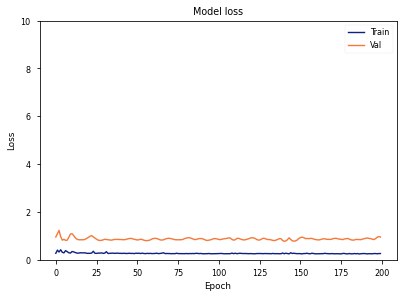

In [132]:
plt.plot(hist_5.history['loss'])
plt.plot(hist_5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=10, bottom=0)
plt.show()

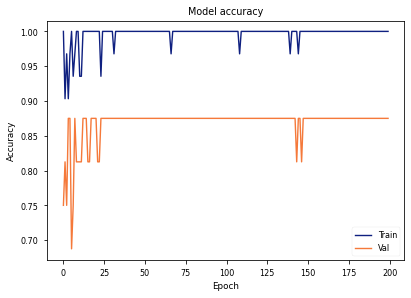

In [133]:
plt.plot(hist_5.history['accuracy'])
plt.plot(hist_5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Test Accuracy**

In [134]:
model_3_OPX.evaluate(X_test3, y_testdm3)[1]

1/1 [==============================] - 0s 14ms/step - loss: 0.8121 - accuracy: 0.8667


0.8666666746139526

**Re-split model loss and accuracy are consistent with previous results.**

## The End